<img src = "https://global-uploads.webflow.com/5f0d53c042a9ed6288de7f8d/5f6337ae2cfaa10946ceeb06_Hacktiv8%20logo%20horizontal%2001%20black-p-500.png" width = 400>
<h1 align=center><font size = 5>Hacktiv8 PTP Introduction to Data Science Projects 2 // Statistical Treatment for Datasets</font></h1>

In [1]:
import math
import statistics

import numpy as np
import scipy
import scipy.stats
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

# for latex equations
from IPython.display import Math, Latex

from scipy.stats import uniform, norm, gamma, expon, poisson, binom, bernoulli

#seaborn configuration
sns.set(color_codes=True)
sns.set(rc={"figure.figsize": (5, 5)})

# 01. Data Preparation

In [2]:
# Load the dataset 
df = pd.read_csv("dataset/nyc-rolling-sales.csv")

print("Data read into pandas dataframe!")

Data read into pandas dataframe!


In [3]:
# View first 5 row
df.head()

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,...,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
1,5,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,...,28,3,31,4616,18690,1900,2,C7,-,2016-12-14 00:00:00
2,6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,,C7,197 EAST 3RD STREET,...,16,1,17,2212,7803,1900,2,C7,-,2016-12-09 00:00:00
3,7,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,...,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00
4,8,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,...,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00


In [4]:
# View last 5 rows
df.tail()

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
84543,8409,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,34,,B9,37 QUAIL LANE,...,2,0,2,2400,2575,1998,1,B9,450000,2016-11-28 00:00:00
84544,8410,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,78,,B9,32 PHEASANT LANE,...,2,0,2,2498,2377,1998,1,B9,550000,2017-04-21 00:00:00
84545,8411,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7351,60,,B2,49 PITNEY AVENUE,...,2,0,2,4000,1496,1925,1,B2,460000,2017-07-05 00:00:00
84546,8412,5,WOODROW,22 STORE BUILDINGS,4,7100,28,,K6,2730 ARTHUR KILL ROAD,...,0,7,7,208033,64117,2001,4,K6,11693337,2016-12-21 00:00:00
84547,8413,5,WOODROW,35 INDOOR PUBLIC AND CULTURAL FACILITIES,4,7105,679,,P9,155 CLAY PIT ROAD,...,0,1,1,10796,2400,2006,4,P9,69300,2016-10-27 00:00:00


In [5]:
# View data dimension
df.shape

(84548, 22)

In [6]:
# Drop Unnamed:0 and EASE-MENT column
df = df.drop(["Unnamed: 0", "EASE-MENT"], axis=1)
df.head()

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,C2,153 AVENUE B,,10009,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
1,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,C7,234 EAST 4TH STREET,,10009,28,3,31,4616,18690,1900,2,C7,-,2016-12-14 00:00:00
2,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,C7,197 EAST 3RD STREET,,10009,16,1,17,2212,7803,1900,2,C7,-,2016-12-09 00:00:00
3,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,C4,154 EAST 7TH STREET,,10009,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00
4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,C2,301 EAST 10TH STREET,,10009,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00


In [7]:
# View features data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84548 entries, 0 to 84547
Data columns (total 20 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   BOROUGH                         84548 non-null  int64 
 1   NEIGHBORHOOD                    84548 non-null  object
 2   BUILDING CLASS CATEGORY         84548 non-null  object
 3   TAX CLASS AT PRESENT            84548 non-null  object
 4   BLOCK                           84548 non-null  int64 
 5   LOT                             84548 non-null  int64 
 6   BUILDING CLASS AT PRESENT       84548 non-null  object
 7   ADDRESS                         84548 non-null  object
 8   APARTMENT NUMBER                84548 non-null  object
 9   ZIP CODE                        84548 non-null  int64 
 10  RESIDENTIAL UNITS               84548 non-null  int64 
 11  COMMERCIAL UNITS                84548 non-null  int64 
 12  TOTAL UNITS                     84548 non-null

In [8]:
# First, let's check which columns should be categorical
print("Column name")
for col in df.columns:
    if df[col].dtype=="object":
        print(col, df[col].nunique())

Column name
NEIGHBORHOOD 254
BUILDING CLASS CATEGORY 47
TAX CLASS AT PRESENT 11
BUILDING CLASS AT PRESENT 167
ADDRESS 67563
APARTMENT NUMBER 3989
LAND SQUARE FEET 6062
GROSS SQUARE FEET 5691
BUILDING CLASS AT TIME OF SALE 166
SALE PRICE 10008
SALE DATE 364


In [9]:
# LAND SQUARE FEET,GROSS SQUARE FEET, SALE PRICE, BOROUGH should be numeric. 
# SALE DATE datetime format.
# Categorical: NEIGHBORHOOD, BUILDING CLASS CATEGORY, TAX CLASS AT PRESENT, BUILDING CLASS AT PRESENT,
# BUILDING CLASS AT TIME OF SALE, TAX CLASS AT TIME OF SALE,BOROUGH 

numer = ["LAND SQUARE FEET", "GROSS SQUARE FEET", "SALE PRICE", "BOROUGH"]
for col in numer: # coerce for missing values
    df[col] = pd.to_numeric(df[col], errors='coerce')

categ = ["NEIGHBORHOOD", "BUILDING CLASS CATEGORY", "TAX CLASS AT PRESENT", "BUILDING CLASS AT PRESENT", "BUILDING CLASS AT TIME OF SALE", "TAX CLASS AT TIME OF SALE"]
for col in categ:
    df[col] = df[col].astype("category")

df["SALE DATE"] = pd.to_datetime(df["SALE DATE"], errors="coerce")

In [10]:
df.head()

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,C2,153 AVENUE B,,10009,5,0,5,1633.0,6440.0,1900,2,C2,6625000.0,2017-07-19
1,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,C7,234 EAST 4TH STREET,,10009,28,3,31,4616.0,18690.0,1900,2,C7,NaN,2016-12-14
2,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,C7,197 EAST 3RD STREET,,10009,16,1,17,2212.0,7803.0,1900,2,C7,NaN,2016-12-09
3,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,C4,154 EAST 7TH STREET,,10009,10,0,10,2272.0,6794.0,1913,2,C4,3936272.0,2016-09-23
4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,C2,301 EAST 10TH STREET,,10009,6,0,6,2369.0,4615.0,1900,2,C2,8000000.0,2016-11-17


In [11]:
# Check missing value
missing = df.isnull().sum()/len(df)*100

print(pd.DataFrame([missing[missing>0],pd.Series(df.isnull().sum()[df.isnull().sum()>1000])], index=["Percent missing","How many missing"]))

                  LAND SQUARE FEET  GROSS SQUARE FEET   SALE PRICE
Percent missing          31.049818          32.658372     17.22217
How many missing      26252.000000       27612.000000  14561.00000


In [12]:
print(df[(df["LAND SQUARE FEET"].isnull()) & (df["GROSS SQUARE FEET"].notnull())].shape)
print(df[(df["LAND SQUARE FEET"].notnull()) & (df["GROSS SQUARE FEET"].isnull())].shape)

(6, 20)
(1366, 20)


In [13]:
df["LAND SQUARE FEET"] = df["LAND SQUARE FEET"].mask((df["LAND SQUARE FEET"].isnull()) & (df["GROSS SQUARE FEET"].notnull()), df["GROSS SQUARE FEET"])
df["GROSS SQUARE FEET"] = df["GROSS SQUARE FEET"].mask((df["LAND SQUARE FEET"].notnull()) & (df["GROSS SQUARE FEET"].isnull()), df["LAND SQUARE FEET"])

In [14]:
#  Check for duplicates before

print(sum(df.duplicated()))

df[df.duplicated(keep=False)].sort_values(["NEIGHBORHOOD", "ADDRESS"]).head(10)

# df.duplicated() automatically excludes duplicates, to keep duplicates in df we use keep=False

# in df.duplicated(df.columns) we can specify column names to look for duplicates only in those mentioned columns

765


,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
76286,5,ANNADALE,02 TWO FAMILY DWELLINGS,1,6350,7,B2,106 BENNETT PLACE,,10312,2,0,2,8000.0,4208.0,1985,1,B2,NaN,2017-06-27
76287,5,ANNADALE,02 TWO FAMILY DWELLINGS,1,6350,7,B2,106 BENNETT PLACE,,10312,2,0,2,8000.0,4208.0,1985,1,B2,NaN,2017-06-27
76322,5,ANNADALE,05 TAX CLASS 1 VACANT LAND,1B,6459,28,V0,N/A HYLAN BOULEVARD,,0,0,0,0,6667.0,6667.0,0,1,V0,NaN,2017-05-11
76323,5,ANNADALE,05 TAX CLASS 1 VACANT LAND,1B,6459,28,V0,N/A HYLAN BOULEVARD,,0,0,0,0,6667.0,6667.0,0,1,V0,NaN,2017-05-11
76383,5,ARDEN HEIGHTS,01 ONE FAMILY DWELLINGS,1,5741,93,A5,266 ILYSSA WAY,,10312,1,0,1,500.0,1354.0,1996,1,A5,320000.0,2017-06-06
76384,5,ARDEN HEIGHTS,01 ONE FAMILY DWELLINGS,1,5741,93,A5,266 ILYSSA WAY,,10312,1,0,1,500.0,1354.0,1996,1,A5,320000.0,2017-06-06
76643,5,ARROCHAR,02 TWO FAMILY DWELLINGS,1,3103,57,B2,129 MC CLEAN AVENUE,,10305,2,0,2,5000.0,2733.0,1925,1,B2,NaN,2017-03-21
76644,5,ARROCHAR,02 TWO FAMILY DWELLINGS,1,3103,57,B2,129 MC CLEAN AVENUE,,10305,2,0,2,5000.0,2733.0,1925,1,B2,NaN,2017-03-21
50126,4,ASTORIA,03 THREE FAMILY DWELLINGS,1,856,139,C0,22-18 27TH STREET,,11105,3,0,3,2000.0,1400.0,1930,1,C0,NaN,2017-01-12
50127,4,ASTORIA,03 THREE FAMILY DWELLINGS,1,856,139,C0,22-18 27TH STREET,,11105,3,0,3,2000.0,1400.0,1930,1,C0,NaN,2017-01-12


In [15]:
df.drop_duplicates(inplace=True)

print(sum(df.duplicated()))

0


# 02. Exploratory Data Analysis

**2.1 Recheck the dataset**

In [16]:
df.head(10)

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,C2,153 AVENUE B,,10009,5,0,5,1633.0,6440.0,1900,2,C2,6625000.0,2017-07-19
1,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,C7,234 EAST 4TH STREET,,10009,28,3,31,4616.0,18690.0,1900,2,C7,NaN,2016-12-14
2,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,C7,197 EAST 3RD STREET,,10009,16,1,17,2212.0,7803.0,1900,2,C7,NaN,2016-12-09
3,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,C4,154 EAST 7TH STREET,,10009,10,0,10,2272.0,6794.0,1913,2,C4,3936272.0,2016-09-23
4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,C2,301 EAST 10TH STREET,,10009,6,0,6,2369.0,4615.0,1900,2,C2,8000000.0,2016-11-17
5,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,405,16,C4,516 EAST 12TH STREET,,10009,20,0,20,2581.0,9730.0,1900,2,C4,NaN,2017-07-20
6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,406,32,C4,210 AVENUE B,,10009,8,0,8,1750.0,4226.0,1920,2,C4,3192840.0,2016-09-23
7,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,407,18,C7,520 EAST 14TH STREET,,10009,44,2,46,5163.0,21007.0,1900,2,C7,NaN,2017-07-20
8,1,ALPHABET CITY,08 RENTALS - ELEVATOR APARTMENTS,2,379,34,D5,141 AVENUE D,,10009,15,0,15,1534.0,9198.0,1920,2,D5,NaN,2017-06-20
9,1,ALPHABET CITY,08 RENTALS - ELEVATOR APARTMENTS,2,387,153,D9,629 EAST 5TH STREET,,10009,24,0,24,4489.0,18523.0,1920,2,D9,16232000.0,2016-11-07


In [17]:
# View data dimension
df.shape

(83783, 20)

In [18]:
# View non-duplicate content of RESIDENTIAL UNITS & COMMERCIAL UNITS
print(df["RESIDENTIAL UNITS"].value_counts())
print(df["COMMERCIAL UNITS"].value_counts())

1      34465
0      24546
2      15918
3       4566
4       1334
       ...  
420        1
165        1
550        1
168        1
283        1
Name: RESIDENTIAL UNITS, Length: 176, dtype: int64
0       78777
1        3520
2         771
3         249
4         131
5          73
6          69
7          28
8          23
9          20
10         15
12         12
15         11
11         10
17          6
14          6
13          4
20          4
35          4
18          3
254         3
22          3
42          3
19          3
16          2
25          2
126         2
422         2
73          1
67          1
147         1
318         1
2261        1
172         1
62          1
59          1
184         1
56          1
55          1
436         1
52          1
51          1
49          1
38          1
21          1
34          1
32          1
31          1
30          1
28          1
91          1
27          1
26          1
24          1
23          1
Name: COMMERCIAL UNITS, dtype: int64

<font color="tomato"> **Notes:**

<font color = "steelblue">If RESIDENTIAL UNITS not equal 0 then the data is not a residential.
The same with COMMERCIAL UNITS.

In [19]:
# View COMMERCIAL UNITS simple descriptive statistics
df[df["COMMERCIAL UNITS"]!=0].describe()

,BOROUGH,BLOCK,LOT,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,SALE PRICE
count,5006.000000,5006.000000,5006.000000,5006.000000,5006.000000,5006.000000,5006.000000,4.954000e+03,4.954000e+03,5006.000000,3.978000e+03
mean,2.920296,3756.993208,72.658610,10898.462245,6.850579,3.074111,9.914503,1.149824e+04,2.010289e+04,1927.491011,5.989329e+06
std,1.118119,3191.143055,225.476721,674.801858,55.199043,34.963476,65.703340,1.044423e+05,1.098984e+05,142.397476,4.561011e+07
min,1.000000,5.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000e+00,0.000000e+00,0.000000,0.000000e+00
25%,2.000000,1161.000000,11.000000,10456.000000,0.000000,1.000000,1.000000,1.929250e+03,2.566500e+03,1920.000000,0.000000e+00
50%,3.000000,2803.000000,32.000000,11211.000000,1.000000,1.000000,3.000000,2.514000e+03,4.006000e+03,1931.000000,7.500000e+05
75%,4.000000,5574.000000,52.000000,11234.750000,2.000000,2.000000,5.000000,6.000000e+03,8.798500e+03,1950.000000,2.550000e+06
max,5.000000,16230.000000,8009.000000,11694.000000,1844.000000,2261.000000,2261.000000,4.228300e+06,3.750565e+06,2017.000000,2.210000e+09


<font color="tomato"> **Notes:**
    

<font color = "steelblue">Insights from table above:

- Commercial units are sold in 5,006 boroughs with max units sold 2,261 in 1 borough
- Other columns also have outliers which needs further investigation.
- Year column has a year with 0
- Most sales prices less than 10000 can be treated as gift or transfer fees
    

In [20]:
# View RESIDENTIAL UNITS simple descriptive statistics
df[df["RESIDENTIAL UNITS"]!=0].describe()

,BOROUGH,BLOCK,LOT,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,SALE PRICE
count,59237.000000,59237.000000,59237.000000,59237.000000,59237.000000,59237.000000,59237.000000,4.823100e+04,4.823100e+04,59237.000000,4.875200e+04
mean,3.188767,4610.712342,414.339788,10903.841552,2.828705,0.069433,2.897277,3.156000e+03,3.287738e+03,1837.171987,1.130316e+06
std,1.219989,3686.816317,687.593893,603.316848,19.645674,0.460570,19.832720,2.814200e+04,2.982401e+04,456.570222,4.535920e+06
min,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000e+00,0.000000e+00,0.000000,0.000000e+00
25%,3.000000,1490.000000,26.000000,10312.000000,1.000000,0.000000,1.000000,1.850000e+03,1.248000e+03,1920.000000,2.900000e+05
50%,3.000000,3937.000000,56.000000,11214.000000,1.000000,0.000000,1.000000,2.422000e+03,1.800000e+03,1935.000000,5.800000e+05
75%,4.000000,6713.000000,1009.000000,11360.000000,2.000000,0.000000,2.000000,3.500000e+03,2.600000e+03,1979.000000,9.800000e+05
max,5.000000,16322.000000,9106.000000,11694.000000,1844.000000,25.000000,1866.000000,4.228300e+06,3.750565e+06,2017.000000,6.200000e+08


<font color="tomato"> **Notes:**
    

<font color = "steelblue">Insights from table above:

- Residential units are sold in 59,237 boroughs with max units sold 1,844 in 1 borough
- On average, 2 units are sold
- Other columns also have outliers which needs further investigation.
- Year column has a year with 0
- Most sales prices less than 10000 can be treated as gift or transfer fees
    

In [21]:
# Count non-duplicate BOROUGH
print(df["BOROUGH"].value_counts())

4    26548
3    23843
1    18102
5     8296
2     6994
Name: BOROUGH, dtype: int64


**2.2 Mean**

In [22]:
# Average properties price in the data
df["SALE PRICE"].mean()

1280703.0003016938

In [23]:
# Average properties price in each borough
df1 = df.groupby(["BOROUGH"]) \
      .agg(mean_saleprice = pd.NamedAgg("SALE PRICE", np.mean)) \
      .reset_index()

df1

,BOROUGH,mean_saleprice
0,1,3.344642e+06
1,2,5.946771e+05
2,3,8.410834e+05
3,4,7.388827e+05
4,5,5.436113e+05


<font color="tomato"> **Notes:**
    

<font color = "steelblue">Insights from table above:

- Borough 1 has higher average sale price than the average of all borough
- Among 5 boroughs, Borough 5 has the smallest average sale price
    

**2.3 Median**

In [24]:
# Median of properties price in the data
df["SALE PRICE"].median()

533000.0

In [25]:
# Average properties price in each building class category
df2 = df.groupby(["BUILDING CLASS CATEGORY"]) \
      .agg(med_saleprice = pd.NamedAgg("SALE PRICE", np.median)) \
      .reset_index()

df2.sort_values(by="med_saleprice")

,BUILDING CLASS CATEGORY,med_saleprice
46,49 CONDO WAREHOUSES/FACTORY/INDUS,0.0
45,48 CONDO TERRACES/GARDENS/CABANAS,0.0
38,41 TAX CLASS 4 - OTHER,0.0
16,16 CONDOS - 2-10 UNIT WITH COMMERCIAL UNIT,0.0
41,44 CONDO PARKING,0.0
18,18 TAX CLASS 3 - UNTILITY PROPERTIES,0.0
44,47 CONDO NON-BUSINESS STORAGE,0.0
5,06 TAX CLASS 1 - OTHER,0.0
36,39 TRANSPORTATION FACILITIES,110000.0
4,05 TAX CLASS 1 VACANT LAND,112007.0


<font color="tomato"> **Notes:**
    

<font color = "steelblue">Insights from table above:

- Median of properties sale price is 533,000
- 14 category of building have lower median sale price than the median of all data
- Category of "THEATRES" and "LUXURY HOTELS" have significant median price among other category (>10,000,000)
    

**2.4 Modus**

In [26]:
# Mode of borough in all data
df["BOROUGH"].mode()

0    4
dtype: int64

In [27]:
# Mode of borough in each building class category
df3 = df.groupby(["BUILDING CLASS CATEGORY"]) \
      .agg(mod_borough = pd.NamedAgg("BOROUGH", scipy.stats.mode)) \
      .reset_index()

df3.sort_values(by="mod_borough")

,BUILDING CLASS CATEGORY,mod_borough
37,40 SELECTED GOVERNMENTAL FACILITIES,"([1], [1])"
10,11 SPECIAL CONDO BILLING LOTS,"([1], [1])"
31,34 THEATRES,"([1], [8])"
33,36 OUTDOOR RECREATIONAL FACILITIES,"([1], [9])"
22,25 LUXURY HOTELS,"([1], [11])"
25,28 COMMERCIAL CONDOS,"([1], [13])"
21,23 LOFT BUILDINGS,"([1], [36])"
23,26 OTHER HOTELS,"([1], [57])"
43,46 CONDO STORE BUILDINGS,"([1], [80])"
19,21 OFFICE BUILDINGS,"([1], [106])"


<font color="tomato"> **Notes:**
    

<font color = "steelblue">Insights from table above:

- Mode of borough in all data is Borough 4
- As in each building class category, only 5 categories have Borough 4 as their mode
- Most borough that is a mode in each building class category is Borough 3
    

**2.5 Range**

In [28]:
# Exclude null sale price
df_temp = df.loc[df["SALE PRICE"].notnull(), :]
df_temp

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,C2,153 AVENUE B,,10009,5,0,5,1633.0,6440.0,1900,2,C2,6625000.0,2017-07-19
3,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,C4,154 EAST 7TH STREET,,10009,10,0,10,2272.0,6794.0,1913,2,C4,3936272.0,2016-09-23
4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,C2,301 EAST 10TH STREET,,10009,6,0,6,2369.0,4615.0,1900,2,C2,8000000.0,2016-11-17
6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,406,32,C4,210 AVENUE B,,10009,8,0,8,1750.0,4226.0,1920,2,C4,3192840.0,2016-09-23
9,1,ALPHABET CITY,08 RENTALS - ELEVATOR APARTMENTS,2,387,153,D9,629 EAST 5TH STREET,,10009,24,0,24,4489.0,18523.0,1920,2,D9,16232000.0,2016-11-07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84543,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,34,B9,37 QUAIL LANE,,10309,2,0,2,2400.0,2575.0,1998,1,B9,450000.0,2016-11-28
84544,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,78,B9,32 PHEASANT LANE,,10309,2,0,2,2498.0,2377.0,1998,1,B9,550000.0,2017-04-21
84545,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7351,60,B2,49 PITNEY AVENUE,,10309,2,0,2,4000.0,1496.0,1925,1,B2,460000.0,2017-07-05
84546,5,WOODROW,22 STORE BUILDINGS,4,7100,28,K6,2730 ARTHUR KILL ROAD,,10309,0,7,7,208033.0,64117.0,2001,4,K6,11693337.0,2016-12-21


In [29]:
df_temp1 = df_temp.loc[df_temp["SALE PRICE"]!=0, :]
df_temp1

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,C2,153 AVENUE B,,10009,5,0,5,1633.0,6440.0,1900,2,C2,6625000.0,2017-07-19
3,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,C4,154 EAST 7TH STREET,,10009,10,0,10,2272.0,6794.0,1913,2,C4,3936272.0,2016-09-23
4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,C2,301 EAST 10TH STREET,,10009,6,0,6,2369.0,4615.0,1900,2,C2,8000000.0,2016-11-17
6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,406,32,C4,210 AVENUE B,,10009,8,0,8,1750.0,4226.0,1920,2,C4,3192840.0,2016-09-23
9,1,ALPHABET CITY,08 RENTALS - ELEVATOR APARTMENTS,2,387,153,D9,629 EAST 5TH STREET,,10009,24,0,24,4489.0,18523.0,1920,2,D9,16232000.0,2016-11-07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84543,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,34,B9,37 QUAIL LANE,,10309,2,0,2,2400.0,2575.0,1998,1,B9,450000.0,2016-11-28
84544,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,78,B9,32 PHEASANT LANE,,10309,2,0,2,2498.0,2377.0,1998,1,B9,550000.0,2017-04-21
84545,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7351,60,B2,49 PITNEY AVENUE,,10309,2,0,2,4000.0,1496.0,1925,1,B2,460000.0,2017-07-05
84546,5,WOODROW,22 STORE BUILDINGS,4,7100,28,K6,2730 ARTHUR KILL ROAD,,10309,0,7,7,208033.0,64117.0,2001,4,K6,11693337.0,2016-12-21


In [30]:
# Range of properties price in each borough
df4 = df_temp1.groupby(["BOROUGH"]) \
      .agg(range_saleprice = pd.NamedAgg("SALE PRICE", np.ptp)) \
      .reset_index()

df4.sort_values(by="range_saleprice")

,BOROUGH,range_saleprice
1,2,1.100000e+08
4,5,1.220000e+08
3,4,2.575000e+08
2,3,3.450000e+08
0,1,2.210000e+09


<font color="tomato"> **Notes:**
    

<font color = "steelblue">Insights from table above:

- Borough 1 has the highest sale price range

**2.6 Variance**

In [31]:
# Variance of properties price in each borough
df5 = df_temp1.groupby(["BOROUGH"]) \
      .agg(var_saleprice = pd.NamedAgg("SALE PRICE", np.var)) \
      .reset_index()

df5.sort_values(by="var_saleprice")

,BOROUGH,var_saleprice
4,5,3.631100e+12
1,2,1.039236e+13
3,4,1.041624e+13
2,3,2.322026e+13
0,1,5.827628e+14


<font color="tomato"> **Notes:**
    

<font color = "steelblue">Insights from table above:

- Borough 1 has the highest sale price variance

**2.7 Standard Deviation**

In [32]:
# Standard deviation of properties price in each building class category
df6 = df_temp1.groupby(["BUILDING CLASS CATEGORY"]) \
      .agg(std_saleprice = pd.NamedAgg("SALE PRICE", np.std)) \
      .reset_index()

df6.sort_values(by="std_saleprice")

,BUILDING CLASS CATEGORY,std_saleprice
46,49 CONDO WAREHOUSES/FACTORY/INDUS,5.734518e+03
44,47 CONDO NON-BUSINESS STORAGE,6.876000e+04
45,48 CONDO TERRACES/GARDENS/CABANAS,4.832778e+05
12,12 CONDOS - WALKUP APARTMENTS,5.077361e+05
3,04 TAX CLASS 1 CONDOS,5.842417e+05
5,06 TAX CLASS 1 - OTHER,6.348076e+05
1,02 TWO FAMILY DWELLINGS,8.829285e+05
0,01 ONE FAMILY DWELLINGS,9.801897e+05
2,03 THREE FAMILY DWELLINGS,1.033324e+06
8,09 COOPS - WALKUP APARTMENTS,1.066299e+06


<font color="tomato"> **Notes:**
    

<font color = "steelblue">Insights from table above:

- Office building has the highest price standard deviation

**2.8 Probability Distribution**

In [33]:
# Create dataset for specific range of sale price
df_temp2 = df_temp1[df_temp1["SALE PRICE"] < 1E6]

/Users/septyaprilliandary/opt/anaconda3/envs/hacktiv8-env/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.015, 'Distribution of Properties Sale Price')

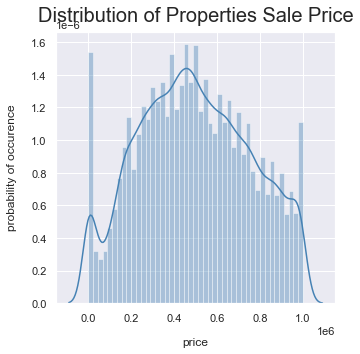

In [34]:
sns.distplot(df_temp2["SALE PRICE"],
            color="steelblue")
plt.xlabel("price", labelpad=14)
plt.ylabel("probability of occurence", labelpad=14)
plt.title("Distribution of Properties Sale Price", y=1.015, fontsize=20)


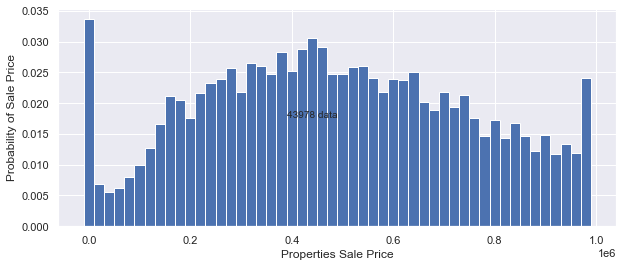

In [35]:
%matplotlib inline
H, edges = np.histogram(df_temp2["SALE PRICE"], bins=50)

plt.figure(figsize=(10, 4))
ax = plt.subplot(111)
ax.bar(edges[:-1], H / float(sum(H)), width=edges[1] - edges[0])
ax.text(0.5, 0.5, "%g data" % len(df_temp2),
        horizontalalignment="right", transform=ax.transAxes)
ax.set_xlabel("Properties Sale Price")
ax.set_ylabel("Probability of Sale Price")
ax.minorticks_on()
plt.show()

<font color="tomato"> **Notes:**
    

<font color = "steelblue">Insights from table above:

- Probability distribution of properties with sale price < 1E6 is in normal distribution with outlier in left and right tail

**2.9 Confidence Interval**

In [36]:
# View the mean and std for sale price in each borough
df_temp1.groupby("BOROUGH").aggregate({"SALE PRICE": [np.mean, np.std, np.size]})

SALE PRICE                       
                 mean           std     size
BOROUGH                                     
1        3.344642e+06  2.414048e+07  14374.0
2        8.047933e+05  3.223718e+06   5168.0
3        1.280830e+06  4.818740e+06  15657.0
4        7.388827e+05  3.227420e+06  18410.0
5        5.436113e+05  1.905544e+06   5986.0

In [37]:
# Since Borough 4 has highest mean, let's calculate CI for Borough 4
mean_borough4 = 7.399086e+05
std_borough4 = 3.233884e+06	
n_borough4 = 18441
z = 1.96

stderr_mean_borough4 = std_borough4  / np.sqrt(n_borough4 )
print("Standard error mean of sale price in Borough 4:", stderr_mean_borough4)

Standard error mean of sale price in Borough 4: 23813.99201717212


In [38]:
def compute_CI(estimate, stderr, z_score=1.96):
    return (
        estimate - z_score*stderr,
        estimate + z_score*stderr
    )

In [39]:
lower_ci, upper_ci = compute_CI(mean_borough4, stderr_mean_borough4)
print(f"CI for sale price in Borough 4: [{lower_ci:.3f}, {upper_ci:.3f}]",)

CI for sale price in Borough 4: [693233.176, 786584.024]


<font color="tomato"> **Notes:**
    

<font color = "steelblue">Insights from table above:

- From the CI result, it can be concluded that the true mean of sale price in Borough 4 will fall between 693233.176 and 786584.024

**2.10 Hypothesis Testing**

In [40]:
borough3 = df_temp1[df_temp1["BOROUGH"] == 3]
borough4 = df_temp1[df_temp1["BOROUGH"] == 4]

# num of observation
num_borough3 = len(borough3)
num_borough4 = len(borough4)

# mean
mu_borough3 = borough3["SALE PRICE"].mean()
mu_borough4 = borough4["SALE PRICE"].mean()

# std
std_borough3 = borough3["SALE PRICE"].std()
std_borough4 = borough4["SALE PRICE"].std()

In [41]:
sm.stats.ztest(borough3["SALE PRICE"].dropna(), borough4["SALE PRICE"].dropna(), alternative="two-sided")

(12.347123681273965, 5.048428168806935e-35)

<font color="tomato"> **Notes:**
    

<font color = "steelblue">Insights from table above:

- Because p-value is so small, we can reject the hypothesis that the mean of sale price in Borough 3 and 4 is equal